Saving GoldStanderDataSet.csv to GoldStanderDataSet (10).csv
Epoch 1/20
131/131 [==============================] - 10s 70ms/step - loss: 0.7004 - accuracy: 0.7521 - val_loss: 0.5541 - val_accuracy: 0.7641
Epoch 2/20
131/131 [==============================] - 5s 36ms/step - loss: 0.5387 - accuracy: 0.7604 - val_loss: 0.5160 - val_accuracy: 0.7641
Epoch 3/20
131/131 [==============================] - 2s 17ms/step - loss: 0.4771 - accuracy: 0.7671 - val_loss: 0.4594 - val_accuracy: 0.7851
Epoch 4/20
131/131 [==============================] - 1s 11ms/step - loss: 0.3922 - accuracy: 0.8357 - val_loss: 0.4047 - val_accuracy: 0.8415
Epoch 5/20
131/131 [==============================] - 2s 12ms/step - loss: 0.2955 - accuracy: 0.8830 - val_loss: 0.3741 - val_accuracy: 0.8434
Epoch 6/20
131/131 [==============================] - 1s 8ms/step - loss: 0.2248 - accuracy: 0.9171 - val_loss: 0.3617 - val_accuracy: 0.8491
Epoch 7/20
131/131 [==============================] - 2s 12ms/step - loss: 0.1732

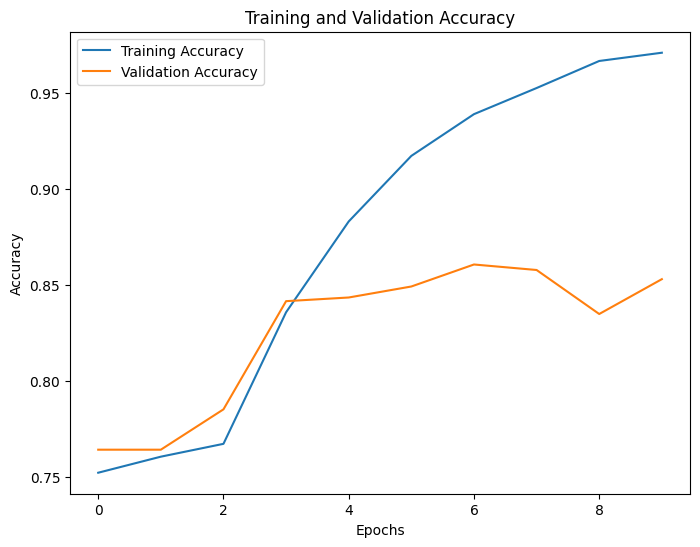

33/33 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8606
Test Accuracy: 0.8605539798736572
33/33 [==============================] - 0s 2ms/step
Accuracy: 0.8605539637058262


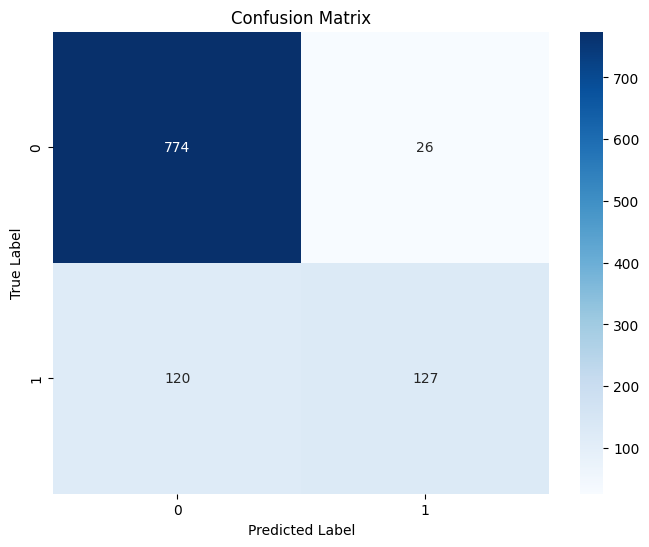

In [28]:
import matplotlib.pyplot as plt
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import files
from keras.callbacks import EarlyStopping  # Corrected import statement
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import TextVectorization

# Load the dataset
uploaded = files.upload()

if uploaded:
    file_name = list(uploaded.keys())[0]
    file_content = uploaded[file_name]

    # Read the CSV from the content
    df = pd.read_csv(io.StringIO(file_content.decode('latin1')))

    # Encode the class labels
    label_encoder = LabelEncoder()
    df['Biased'] = label_encoder.fit_transform(df['Biased'])

    # Check if 'keyword' column exists
    if 'keyword' in df.columns:
        # 1) For every row in the df that has in the column 'keyword' the value 'Israel' - Change the value in 'biased' column to 0
        df.loc[df['keyword'] == 'Israel', 'Biased'] = 0

    # 2) Erase around 30% random rows that have value = 0 in column 'biased'
    if 'Biased' in df.columns:
        biased_rows_index = df[df['Biased'] == 0].index
        rows_to_drop = np.random.choice(biased_rows_index, size=int(0.3 * len(biased_rows_index)), replace=False)
        df.drop(rows_to_drop, inplace=True)

        # Split data into train and test sets
        train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

        # Define the TextVectorization layer
        max_features = 10000  # Maximum vocabulary size
        sequence_length = 100  # Maximum sequence length
        vectorize_layer = TextVectorization(max_tokens=max_features, output_mode='int', output_sequence_length=sequence_length)

        # Adapt the TextVectorization layer to the training data
        train_texts = train_df['Text'].values
        vectorize_layer.adapt(train_texts)

        # Vectorize the training and testing data
        X_train = vectorize_layer(train_texts)
        y_train = train_df['Biased'].values
        X_test = vectorize_layer(test_df['Text'].values)
        y_test = test_df['Biased'].values

        # Define the neural network model
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(max_features + 1, 64),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Define the EarlyStopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train the model with early stopping
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

        # 3) Create a plot graph with x-axis = epochs, y-axis = 'accuracy' after running all the epochs
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()
        plt.show()

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test)
        print("Test Accuracy:", accuracy)

        # Predict on the test set
        y_pred = np.argmax(model.predict(X_test), axis=-1)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)

        # Calculate the confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
    else:
        print("Column 'Biased' not found in the dataset.")
else:
    print("No file uploaded or error in file upload.")


Columns of train_df: Index(['TweetID', 'Username', 'Text', 'CreateDate', 'Biased', 'Keyword'], dtype='object')
Columns of keyword_encoded: Index(['Keyword_Israel', 'Keyword_Jews', 'Keyword_Kikes', 'Keyword_ZioNazi'], dtype='object')
Epoch 1/20
130/130 [==============================] - 10s 74ms/step - loss: 0.6440 - accuracy: 0.7960 - val_loss: 0.4998 - val_accuracy: 0.8039
Epoch 2/20
130/130 [==============================] - 3s 26ms/step - loss: 0.4970 - accuracy: 0.7960 - val_loss: 0.4750 - val_accuracy: 0.8039
Epoch 3/20
130/130 [==============================] - 3s 21ms/step - loss: 0.4470 - accuracy: 0.7970 - val_loss: 0.4323 - val_accuracy: 0.8068
Epoch 4/20
130/130 [==============================] - 1s 8ms/step - loss: 0.3722 - accuracy: 0.8441 - val_loss: 0.3855 - val_accuracy: 0.8435
Epoch 5/20
130/130 [==============================] - 1s 10ms/step - loss: 0.2846 - accuracy: 0.8925 - val_loss: 0.3353 - val_accuracy: 0.8715
Epoch 6/20
130/130 [==============================] 

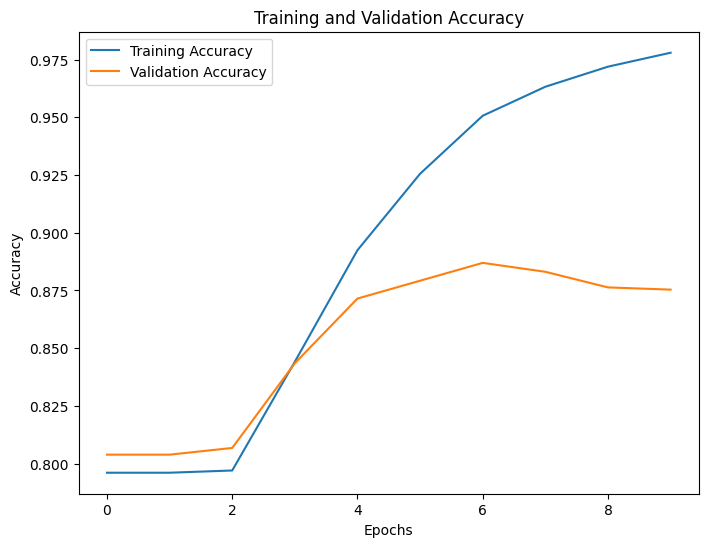

33/33 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8870
Test Accuracy: 0.886956512928009
33/33 [==============================] - 0s 2ms/step
Accuracy: 0.8869565217391304


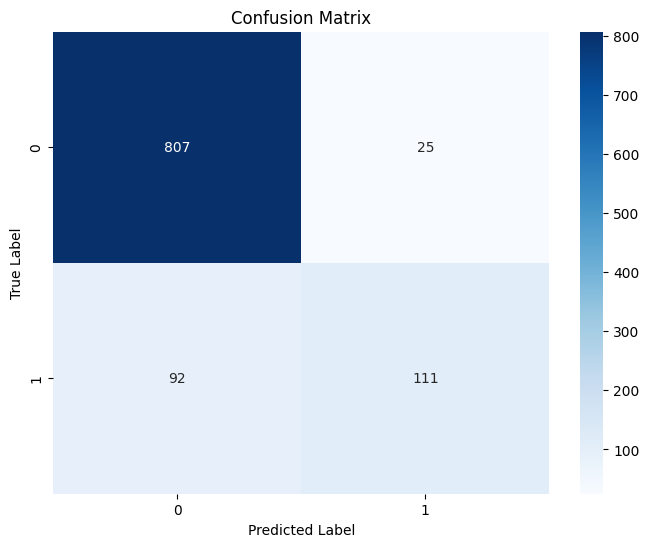

In [41]:
import matplotlib.pyplot as plt
import io
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import files
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import TextVectorization

# Load the dataset
df = pd.read_csv("GoldStanderDataSet.csv", encoding='latin1')

# Encode the class labels
label_encoder = LabelEncoder()
df['Biased'] = label_encoder.fit_transform(df['Biased'])

# 1) For every row in the df that has in the column 'Keyword' the value 'Israel' - Change the value in 'Biased' column to 0
df.loc[df['Keyword'] == 'Israel', 'Biased'] = 0

# 2) Erase around 30% random rows that have value = 0 in column 'Biased'
biased_rows_index = df[df['Biased'] == 0].index
rows_to_drop = np.random.choice(biased_rows_index, size=int(0.3 * len(biased_rows_index)), replace=False)
df.drop(rows_to_drop, inplace=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the TextVectorization layer for text
max_features_text = 10000  # Maximum vocabulary size for text
sequence_length_text = 100  # Maximum sequence length for text
vectorize_layer_text = TextVectorization(max_tokens=max_features_text, output_mode='int', output_sequence_length=sequence_length_text)

# Adapt the TextVectorization layer to the training text data
train_texts = train_df['Text'].values
vectorize_layer_text.adapt(train_texts)

# Vectorize the training and testing text data
X_train_text = vectorize_layer_text(train_texts)
X_test_text = vectorize_layer_text(test_df['Text'].values)

# Convert 'Keyword' column to a one-hot encoded format
keyword_encoded = pd.get_dummies(df['Keyword'], prefix='Keyword')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, keyword_encoded], axis=1)

print("Columns of train_df:", train_df.columns)
print("Columns of keyword_encoded:", keyword_encoded.columns)

# Concatenate the text and keyword data
X_train_combined = np.concatenate((X_train_text, keyword_encoded.iloc[:len(train_df)].values), axis=1)
X_test_combined = np.concatenate((X_test_text, keyword_encoded.iloc[len(train_df):].values), axis=1)

y_train = train_df['Biased'].values
y_test = test_df['Biased'].values

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features_text + 1, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_combined, y_train, epochs=20, batch_size=32, validation_data=(X_test_combined, y_test), callbacks=[early_stopping])

# 3) Create a plot graph with x-axis = epochs, y-axis = 'accuracy' after running all the epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_combined, y_test)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test_combined), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Columns of train_df: Index(['TweetID', 'Username', 'Text', 'CreateDate', 'Biased', 'Keyword'], dtype='object')
Columns of keyword_encoded: Index(['Keyword_Israel', 'Keyword_Jews', 'Keyword_Kikes', 'Keyword_ZioNazi'], dtype='object')
Epoch 1/20
131/131 [==============================] - 11s 78ms/step - loss: 0.6920 - accuracy: 0.7590 - val_loss: 0.5484 - val_accuracy: 0.7708
Epoch 2/20
131/131 [==============================] - 4s 31ms/step - loss: 0.5485 - accuracy: 0.7588 - val_loss: 0.5239 - val_accuracy: 0.7708
Epoch 3/20
131/131 [==============================] - 3s 21ms/step - loss: 0.5072 - accuracy: 0.7588 - val_loss: 0.4819 - val_accuracy: 0.7765
Epoch 4/20
131/131 [==============================] - 1s 11ms/step - loss: 0.4347 - accuracy: 0.8051 - val_loss: 0.4227 - val_accuracy: 0.8243
Epoch 5/20
131/131 [==============================] - 1s 9ms/step - loss: 0.3401 - accuracy: 0.8648 - val_loss: 0.3806 - val_accuracy: 0.8462
Epoch 6/20
131/131 [==============================] 

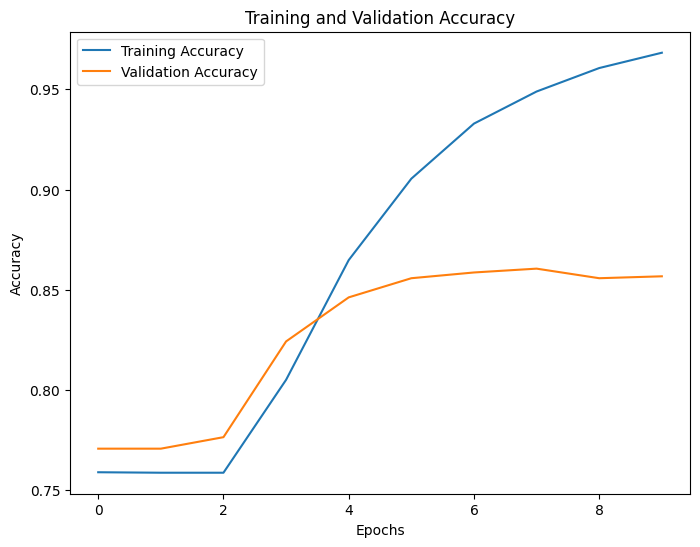

33/33 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8586
Test Accuracy: 0.8586437702178955
33/33 [==============================] - 0s 1ms/step
Accuracy: 0.8586437440305635


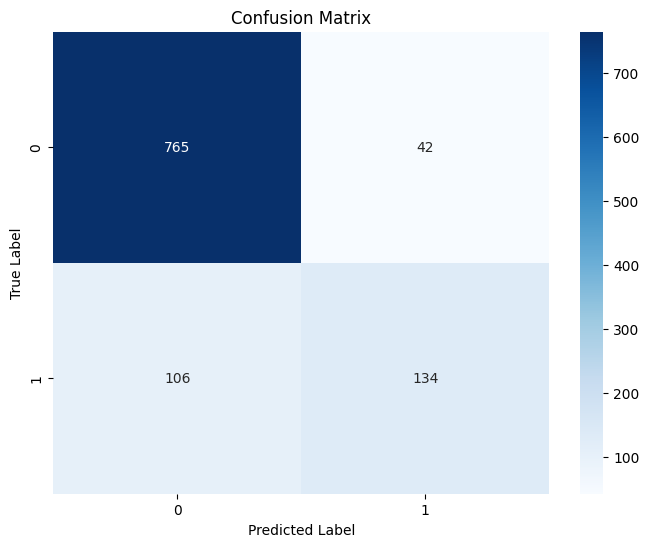

In [42]:
import matplotlib.pyplot as plt
import io
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import files
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import TextVectorization

# Load the dataset
df = pd.read_csv("GoldStanderDataSet.csv", encoding='latin1')

# Encode the class labels
label_encoder = LabelEncoder()
df['Biased'] = label_encoder.fit_transform(df['Biased'])

# 1) For every row in the df that has in the column 'Keyword' the value 'Israel' - Change the value in 'Biased' column to 0
#df.loc[df['Keyword'] == 'Israel', 'Biased'] = 0

# 2) Erase around 30% random rows that have value = 0 in column 'Biased'
biased_rows_index = df[df['Biased'] == 0].index
rows_to_drop = np.random.choice(biased_rows_index, size=int(0.3 * len(biased_rows_index)), replace=False)
df.drop(rows_to_drop, inplace=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the TextVectorization layer for text
max_features_text = 10000  # Maximum vocabulary size for text
sequence_length_text = 100  # Maximum sequence length for text
vectorize_layer_text = TextVectorization(max_tokens=max_features_text, output_mode='int', output_sequence_length=sequence_length_text)

# Adapt the TextVectorization layer to the training text data
train_texts = train_df['Text'].values
vectorize_layer_text.adapt(train_texts)

# Vectorize the training and testing text data
X_train_text = vectorize_layer_text(train_texts)
X_test_text = vectorize_layer_text(test_df['Text'].values)

# Convert 'Keyword' column to a one-hot encoded format
keyword_encoded = pd.get_dummies(df['Keyword'], prefix='Keyword')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, keyword_encoded], axis=1)

print("Columns of train_df:", train_df.columns)
print("Columns of keyword_encoded:", keyword_encoded.columns)

# Concatenate the text and keyword data
X_train_combined = np.concatenate((X_train_text, keyword_encoded.iloc[:len(train_df)].values), axis=1)
X_test_combined = np.concatenate((X_test_text, keyword_encoded.iloc[len(train_df):].values), axis=1)

y_train = train_df['Biased'].values
y_test = test_df['Biased'].values

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features_text + 1, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_combined, y_train, epochs=20, batch_size=32, validation_data=(X_test_combined, y_test), callbacks=[early_stopping])

# 3) Create a plot graph with x-axis = epochs, y-axis = 'accuracy' after running all the epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_combined, y_test)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test_combined), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Saving GoldStanderDataSet.csv to GoldStanderDataSet (21).csv
Epoch 1/10
131/131 [==============================] - 10s 72ms/step - loss: 0.6876 - accuracy: 0.7624 - val_loss: 0.5910 - val_accuracy: 0.7297
Epoch 2/10
131/131 [==============================] - 4s 30ms/step - loss: 0.5283 - accuracy: 0.7690 - val_loss: 0.5662 - val_accuracy: 0.7297
Epoch 3/10
131/131 [==============================] - 4s 27ms/step - loss: 0.4705 - accuracy: 0.7731 - val_loss: 0.5212 - val_accuracy: 0.7536
Epoch 4/10
131/131 [==============================] - 2s 13ms/step - loss: 0.3885 - accuracy: 0.8419 - val_loss: 0.4681 - val_accuracy: 0.8052
Epoch 5/10
131/131 [==============================] - 2s 15ms/step - loss: 0.2938 - accuracy: 0.8863 - val_loss: 0.4276 - val_accuracy: 0.8329
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2179 - accuracy: 0.9190 - val_loss: 0.4562 - val_accuracy: 0.8204
Epoch 7/10
131/131 [==============================] - 1s 11ms/step - loss: 0.1647

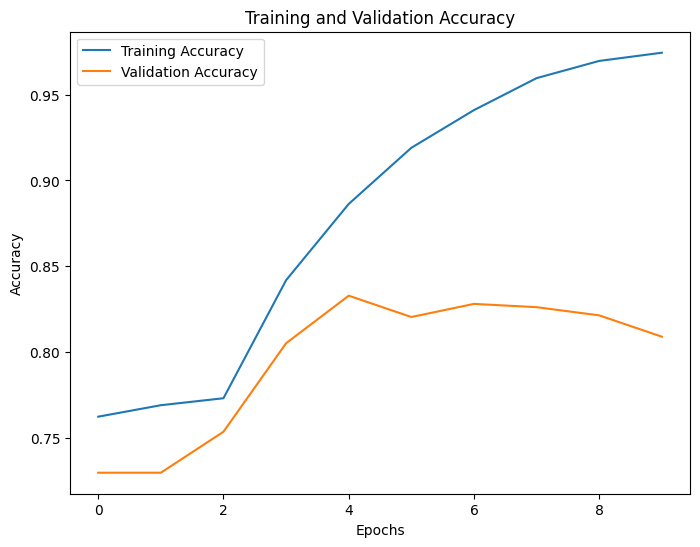

33/33 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8090
Neural Network Test Accuracy: 0.8089780211448669
33/33 [==============================] - 0s 2ms/step
Accuracy: 0.8089780324737345


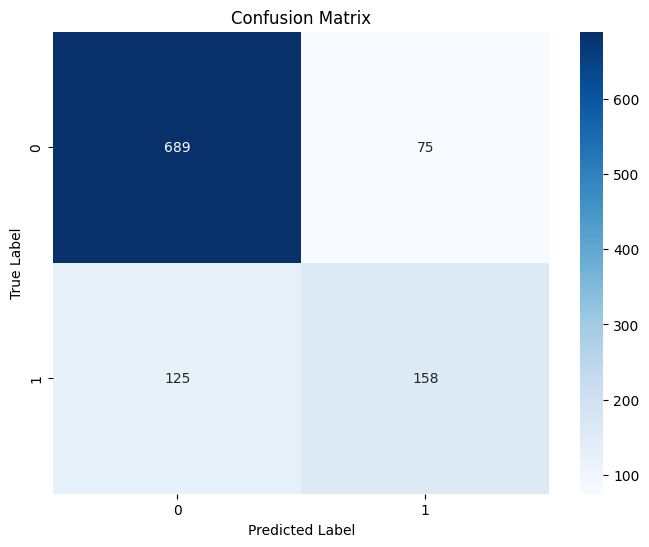

Logistic Regression Test Accuracy: 0.7277936962750716
Random Forest Classifier Test Accuracy: 0.766953199617956


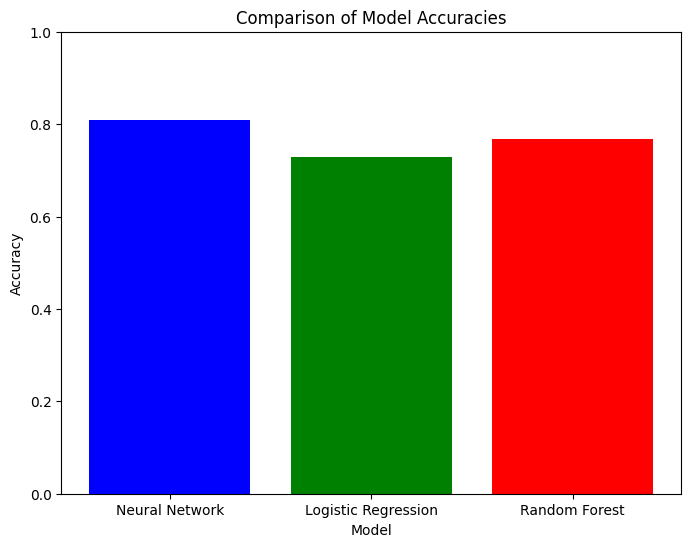

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from io import StringIO
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import TextVectorization
from sklearn.preprocessing import StandardScaler

# Load the dataset
uploaded = files.upload()
csv_data = next(iter(uploaded.values()))

# Try decoding with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1']
for encoding in encodings:
    try:
        df = pd.read_csv(StringIO(csv_data.decode(encoding)))
        break
    except UnicodeDecodeError:
        continue

# Encode the class labels
label_encoder = LabelEncoder()
df['Biased'] = label_encoder.fit_transform(df['Biased'])

# 1) For every row in the df that has in the column 'Keyword' the value 'Israel' - Change the value in 'Biased' column to 0
# df.loc[df['Keyword'] == 'Israel', 'Biased'] = 0

# 2) Erase around 30% random rows that have value = 0 in column 'Biased'
biased_rows_index = df[df['Biased'] == 0].index
rows_to_drop = np.random.choice(biased_rows_index, size=int(0.3 * len(biased_rows_index)), replace=False)
df.drop(rows_to_drop, inplace=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the TextVectorization layer for text
max_features_text = 10000  # Maximum vocabulary size for text
sequence_length_text = 100  # Maximum sequence length for text
vectorize_layer_text = TextVectorization(max_tokens=max_features_text, output_mode='int', output_sequence_length=sequence_length_text)

# Adapt the TextVectorization layer to the training text data
train_texts = train_df['Text'].values
vectorize_layer_text.adapt(train_texts)

# Vectorize the training and testing text data
X_train_text = vectorize_layer_text(train_texts)
X_test_text = vectorize_layer_text(test_df['Text'].values)

# Convert 'Keyword' column to a one-hot encoded format
keyword_encoded = pd.get_dummies(df['Keyword'], prefix='Keyword')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, keyword_encoded], axis=1)

# Concatenate the text and keyword data
X_train_combined = np.concatenate((X_train_text, keyword_encoded.iloc[:len(train_df)].values), axis=1)
X_test_combined = np.concatenate((X_test_text, keyword_encoded.iloc[len(train_df):].values), axis=1)

y_train = train_df['Biased'].values
y_test = test_df['Biased'].values

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features_text + 1, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_data=(X_test_combined, y_test))

# 3) Create a plot graph with x-axis = epochs, y-axis = 'accuracy' after running all the epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_combined, y_test)
print("Neural Network Test Accuracy:", accuracy)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test_combined), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression Model with increased max_iter
logistic_model = LogisticRegression(max_iter=10000)

# Fit the logistic regression model
logistic_model.fit(X_train_combined, y_train)

# Evaluate the logistic regression model
logistic_accuracy = logistic_model.score(X_test_combined, y_test)
print("Logistic Regression Test Accuracy:", logistic_accuracy)

# Random Forest Classifier Model
random_forest_model = RandomForestClassifier()

# Fit the random forest classifier model
random_forest_model.fit(X_train_combined, y_train)

# Evaluate the random forest classifier model
random_forest_accuracy = random_forest_model.score(X_test_combined, y_test)
print("Random Forest Classifier Test Accuracy:", random_forest_accuracy)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
models = ['Neural Network', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy, logistic_accuracy, random_forest_accuracy]
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()


Saving GoldStanderDataSet.csv to GoldStanderDataSet (22).csv
Epoch 1/10
174/174 [==============================] - 12s 63ms/step - loss: 0.6003 - accuracy: 0.8174 - val_loss: 0.4597 - val_accuracy: 0.8301
Epoch 2/10
174/174 [==============================] - 4s 24ms/step - loss: 0.4606 - accuracy: 0.8174 - val_loss: 0.4315 - val_accuracy: 0.8301
Epoch 3/10
174/174 [==============================] - 4s 21ms/step - loss: 0.4077 - accuracy: 0.8210 - val_loss: 0.4007 - val_accuracy: 0.8323
Epoch 4/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3342 - accuracy: 0.8584 - val_loss: 0.3600 - val_accuracy: 0.8769
Epoch 5/10
174/174 [==============================] - 2s 9ms/step - loss: 0.2511 - accuracy: 0.9017 - val_loss: 0.3349 - val_accuracy: 0.8826
Epoch 6/10
174/174 [==============================] - 1s 6ms/step - loss: 0.1898 - accuracy: 0.9278 - val_loss: 0.3473 - val_accuracy: 0.8654
Epoch 7/10
174/174 [==============================] - 2s 9ms/step - loss: 0.1517 -

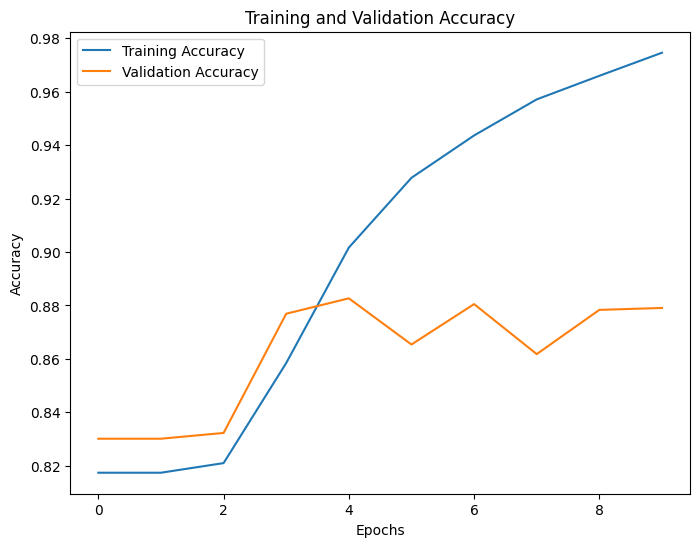

44/44 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8790
Neural Network Test Accuracy: 0.8790496587753296
44/44 [==============================] - 0s 2ms/step
Accuracy: 0.8790496760259179


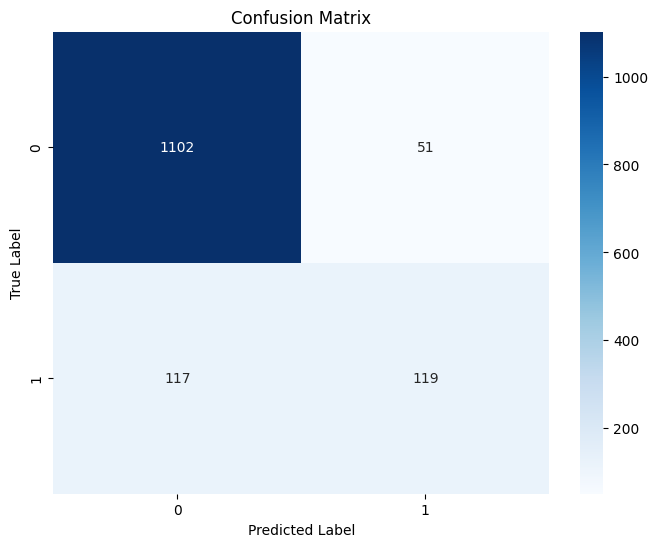

Logistic Regression Test Accuracy: 0.8286537077033838
Random Forest Classifier Test Accuracy: 0.8516918646508279


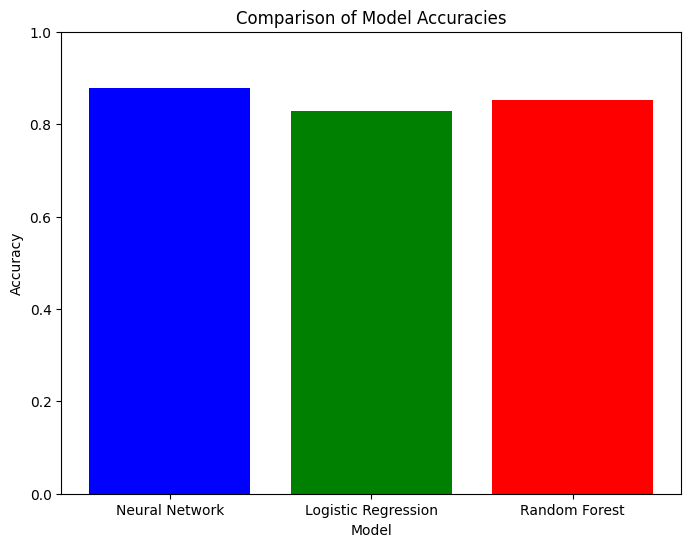

In [52]:
##Without removing 30% or 'biased' = 0

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from io import StringIO
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import TextVectorization
from sklearn.preprocessing import StandardScaler

# Load the dataset
uploaded = files.upload()
csv_data = next(iter(uploaded.values()))

# Try decoding with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1']
for encoding in encodings:
    try:
        df = pd.read_csv(StringIO(csv_data.decode(encoding)))
        break
    except UnicodeDecodeError:
        continue

# Encode the class labels
label_encoder = LabelEncoder()
df['Biased'] = label_encoder.fit_transform(df['Biased'])

# 1) For every row in the df that has in the column 'Keyword' the value 'Israel' - Change the value in 'Biased' column to 0
# df.loc[df['Keyword'] == 'Israel', 'Biased'] = 0

# 2) Erase around 30% random rows that have value = 0 in column 'Biased'
#biased_rows_index = df[df['Biased'] == 0].index
#rows_to_drop = np.random.choice(biased_rows_index, size=int(0.3 * len(biased_rows_index)), replace=False)
#df.drop(rows_to_drop, inplace=True)

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the TextVectorization layer for text
max_features_text = 10000  # Maximum vocabulary size for text
sequence_length_text = 100  # Maximum sequence length for text
vectorize_layer_text = TextVectorization(max_tokens=max_features_text, output_mode='int', output_sequence_length=sequence_length_text)

# Adapt the TextVectorization layer to the training text data
train_texts = train_df['Text'].values
vectorize_layer_text.adapt(train_texts)

# Vectorize the training and testing text data
X_train_text = vectorize_layer_text(train_texts)
X_test_text = vectorize_layer_text(test_df['Text'].values)

# Convert 'Keyword' column to a one-hot encoded format
keyword_encoded = pd.get_dummies(df['Keyword'], prefix='Keyword')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, keyword_encoded], axis=1)

# Concatenate the text and keyword data
X_train_combined = np.concatenate((X_train_text, keyword_encoded.iloc[:len(train_df)].values), axis=1)
X_test_combined = np.concatenate((X_test_text, keyword_encoded.iloc[len(train_df):].values), axis=1)

y_train = train_df['Biased'].values
y_test = test_df['Biased'].values

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features_text + 1, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_data=(X_test_combined, y_test))

# 3) Create a plot graph with x-axis = epochs, y-axis = 'accuracy' after running all the epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_combined, y_test)
print("Neural Network Test Accuracy:", accuracy)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test_combined), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression Model with increased max_iter
logistic_model = LogisticRegression(max_iter=10000)

# Fit the logistic regression model
logistic_model.fit(X_train_combined, y_train)

# Evaluate the logistic regression model
logistic_accuracy = logistic_model.score(X_test_combined, y_test)
print("Logistic Regression Test Accuracy:", logistic_accuracy)

# Random Forest Classifier Model
random_forest_model = RandomForestClassifier()

# Fit the random forest classifier model
random_forest_model.fit(X_train_combined, y_train)

# Evaluate the random forest classifier model
random_forest_accuracy = random_forest_model.score(X_test_combined, y_test)
print("Random Forest Classifier Test Accuracy:", random_forest_accuracy)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
models = ['Neural Network', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy, logistic_accuracy, random_forest_accuracy]
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()
